## Prepare everything

Import the libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_extraction, linear_model, model_selection

Import the dataset

In [3]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

## Visualise the data

Find out the number of characters per tweet

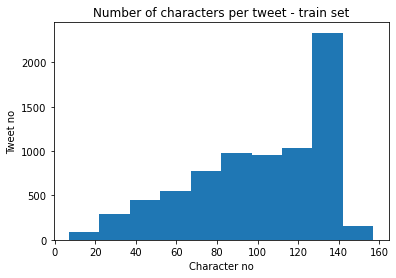

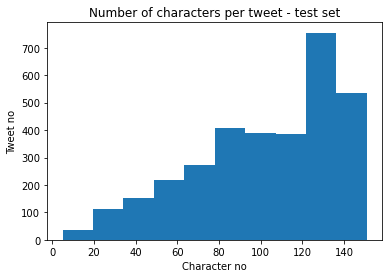

In [78]:
train_character_no = [len(text) for text in train["text"]]
num_bins = 10
plt.hist(train_character_no, num_bins)
plt.xlabel("Character no")
plt.ylabel("Tweet no")
plt.title("Number of characters per tweet - train set")
plt.show()

test_character_no = [len(text) for text in test["text"]]
plt.hist(test_character_no, num_bins)
plt.xlabel("Character no")
plt.ylabel("Tweet no")
plt.title("Number of characters per tweet - test set")
plt.show()

Find out the number of words per tweet

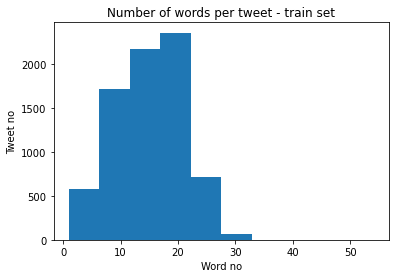

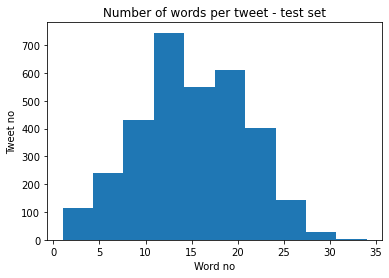

In [72]:
train_word_no = train["text"].apply(lambda tweet : len(tweet.split(" ")))
plt.hist(train_word_no, num_bins)
plt.xlabel("Word no")
plt.ylabel("Tweet no")
plt.title("Number of words per tweet - train set")
plt.show()

test_word_no = test["text"].apply(lambda tweet : len(tweet.split(" ")))
plt.hist(test_word_no, num_bins)
plt.xlabel("Word no")
plt.ylabel("Tweet no")
plt.title("Number of words per tweet - test set")
plt.show()

Average word length

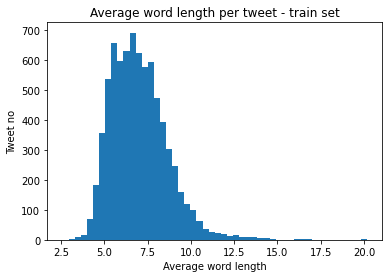

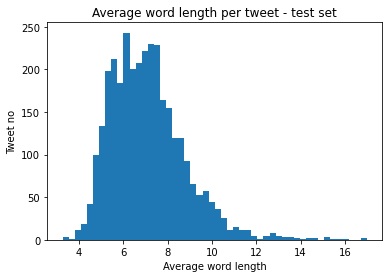

In [98]:
train_avg_word = train_character_no / train_word_no
num_bins = 50
plt.hist(train_avg_word[train_avg_word < 50], num_bins) # Remove outliers
plt.xlabel("Average word length")
plt.ylabel("Tweet no")
plt.title("Average word length per tweet - train set")
plt.show()

test_avg_word = test_character_no / test_word_no
plt.hist(test_avg_word[test_avg_word < 50], num_bins) # Remove outliers
plt.xlabel("Average word length")
plt.ylabel("Tweet no")
plt.title("Average word length per tweet - test set")
plt.show()

In [100]:
train_avg_word[train_avg_word > 50]

6594    60.0
6597    60.0
6602    60.0
6618    60.0
6620    60.0
6623    60.0
6626    60.0
Name: text, dtype: float64

In [102]:
train["text"][6597]

'Truth...\nhttps://t.co/nXS3Z1kxiD\n#News\n#BBC\n#CNN\n#Islam\n#Truth\n#god\n#ISIS\n#terrorism\n#Quran\n#Lies http://t.co/UDKMAdKuzY'

## Preprocess the data

## Create the model

Extract the token count

In [45]:
count_vectoriser = feature_extraction.text.CountVectorizer(ngram_range=(2,2)) #
tokens = count_vectoriser.fit_transform(train["text"])

In [48]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

Fit the model

In [39]:
model = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(model, tokens, train["target"], cv = 3, scoring = "f1")
model.fit(tokens, train["target"])

RidgeClassifier()